In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

## Sample is for shuffling ... used to fill missing values ... works better than mean and median imputation

In [4]:
df = pd.read_csv('C:/Users/bhavna singh/Desktop/data science/datasets/cs-training.csv')
df = df.sample(frac=1)
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
143551,143552,0,0.077414,31,0,0.249250,3000.0,12,0,0,0,0.0
48715,48716,0,1.000000,53,0,0.458344,3900.0,7,0,1,0,0.0
36673,36674,0,0.010020,66,0,29.000000,NaN,11,0,0,0,0.0
142420,142421,0,0.143621,75,0,0.151707,8700.0,4,0,1,0,0.0
26465,26466,0,0.291411,48,0,5286.000000,NaN,7,1,2,0,0.0


In [5]:
df.shape

(150000, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 143551 to 56130
Data columns (total 12 columns):
ID                                      150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 14.9 MB


## Removing columns which can lead to Complete Seperation of Data Points or Quassi Complete Separation ... Cause these columns will not be available for new users

In [7]:
df = df.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse'],axis=1)
df.shape

(150000, 9)

In [8]:
df.SeriousDlqin2yrs.value_counts(normalize=True)

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

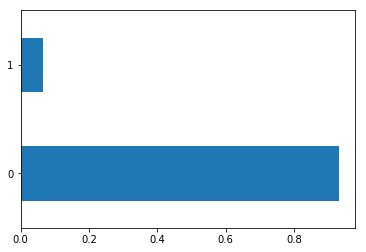

In [9]:
df.SeriousDlqin2yrs.value_counts(normalize=True).plot(kind='barh')
plt.show()

In [10]:
df.RevolvingUtilizationOfUnsecuredLines.describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

## This should not be happening ... cause this value should be in range 0 to 1

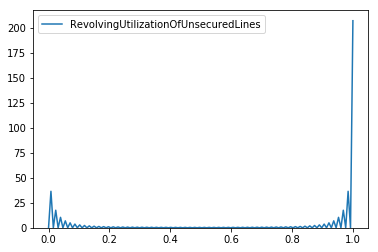

In [11]:
sns.kdeplot(df.RevolvingUtilizationOfUnsecuredLines<1)

## Checking how many values are more than 1

In [12]:
len(df[df['RevolvingUtilizationOfUnsecuredLines']>1])

3321

In [13]:
(df['RevolvingUtilizationOfUnsecuredLines']).describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

## Since the count is more we cant drop .. Hence we need to treat them ... First make them nan and then impute with mean or median

# Outliers are normally dropped from the data set, however since the bumber of outlier observation are large, we will treat these as missing values and impute.

In [14]:
df.RevolvingUtilizationOfUnsecuredLines = df['RevolvingUtilizationOfUnsecuredLines'].apply(lambda x: np.NaN if x>1 else x)

In [15]:
df.RevolvingUtilizationOfUnsecuredLines.head()

143551    0.077414
48715     1.000000
36673     0.010020
142420    0.143621
26465     0.291411
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [16]:
len(df[df['RevolvingUtilizationOfUnsecuredLines']>1])

0

In [17]:
df.RevolvingUtilizationOfUnsecuredLines.describe()

count    146679.000000
mean          0.303782
std           0.337892
min           0.000000
25%           0.028608
50%           0.144476
75%           0.519980
max           1.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

C:\Users\bhavna singh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\bhavna singh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


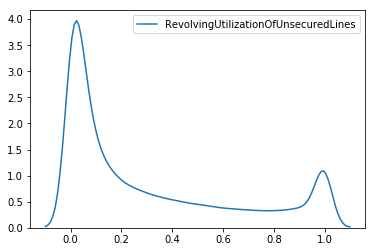

In [18]:
sns.kdeplot(df.RevolvingUtilizationOfUnsecuredLines)

## Since we have the contextual knowledge hence we have identified the outliers saying > 1 are all outliers otherwise u go with either z score or box plot

In [19]:
df['RevolvingUtilizationOfUnsecuredLines'].fillna(method='ffill',inplace=True)

# After imputing with median, we noticed a spike at the place of median hence, we adopted an imputation method which preserved the distribution of data. (method = 'ffill')

In [20]:
df.RevolvingUtilizationOfUnsecuredLines.head()

143551    0.077414
48715     1.000000
36673     0.010020
142420    0.143621
26465     0.291411
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [21]:
df.RevolvingUtilizationOfUnsecuredLines.isnull().sum()

0

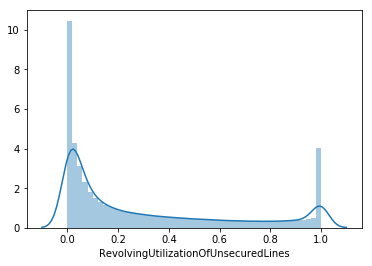

In [22]:
sns.distplot(df['RevolvingUtilizationOfUnsecuredLines'])

# Now working with Age column

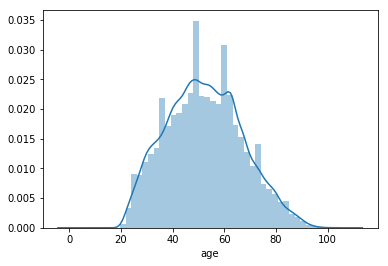

In [23]:
sns.distplot(df.age)

In [24]:
df.age.describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [25]:
len(df[df.age>80])

4936

In [26]:
df.age = df.age.apply(lambda x : np.NaN if (x>80)|(x<18) else x)

## Finance industry typically limit age of customer between 18 and 80. Also there are about 4900 observations above 80 years of age. Since this is large, we made those observation values missing to impute later.

In [27]:
len(df[df.age>80])

0

In [28]:
df.age.describe()

count    145063.000000
mean         51.171663
std          13.665503
min          21.000000
25%          41.000000
50%          51.000000
75%          62.000000
max          80.000000
Name: age, dtype: float64

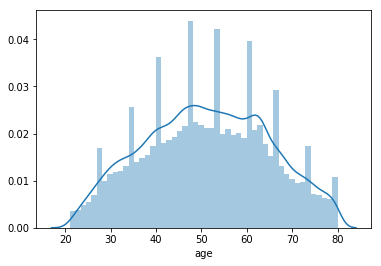

In [29]:
sns.distplot(df.age.dropna())

In [30]:
df['age'].fillna(method='ffill',inplace=True)

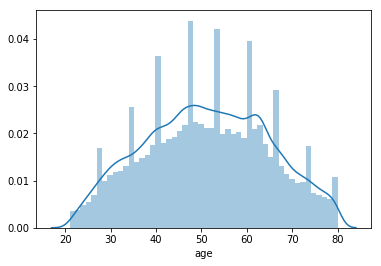

In [29]:
sns.distplot(df.age)

In [30]:
df.age.describe()

count    150000.000000
mean         51.169207
std          13.664200
min          21.000000
25%          41.000000
50%          51.000000
75%          62.000000
max          80.000000
Name: age, dtype: float64

# Now working with Debt Ratio

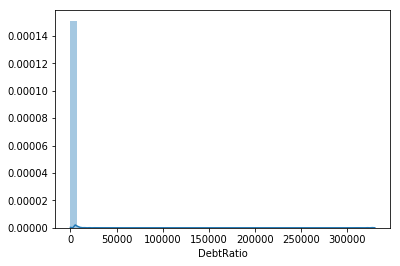

In [31]:
sns.distplot(df.DebtRatio)

In [32]:
df.DebtRatio.describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

In [33]:
len(df[df['DebtRatio']>1])

35137

In [34]:
df.DebtRatio = df.DebtRatio.apply(lambda x: np.NaN if x>1 else x)

In [35]:
len(df[df['DebtRatio']>1])

0

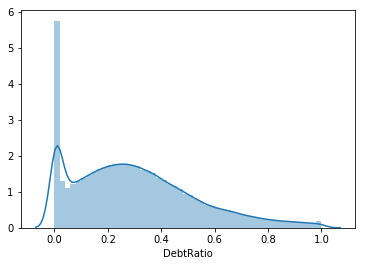

In [36]:
sns.distplot(df.DebtRatio.dropna())

In [37]:
df.DebtRatio.describe()

count    114863.000000
mean          0.303022
std           0.226287
min           0.000000
25%           0.125981
50%           0.274505
75%           0.438098
max           1.000000
Name: DebtRatio, dtype: float64

In [38]:
df.DebtRatio.fillna(method='ffill',inplace=True)

In [39]:
df.DebtRatio.describe()

count    150000.000000
mean          0.302780
std           0.226622
min           0.000000
25%           0.125551
50%           0.273829
75%           0.437432
max           1.000000
Name: DebtRatio, dtype: float64

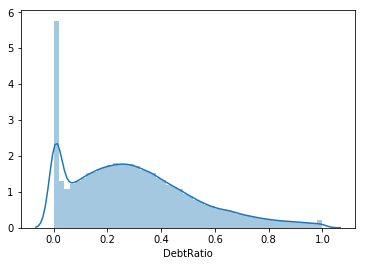

In [40]:
sns.distplot(df.DebtRatio)

## When imputed with median, thee distribution of the data was messed up and hence we went with ffill.

In [41]:
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
93335,93336,0,0.000000,75.0,0.000952,10500.0,8,0,0.0
12925,12926,0,0.002885,43.0,0.674522,5600.0,7,1,0.0
27297,27298,0,0.489130,33.0,0.674522,NaN,9,0,0.0
95905,95906,0,0.324553,49.0,0.352995,10900.0,12,2,2.0
122743,122744,0,0.019486,40.0,0.352995,NaN,4,0,NaN


# Now working on NumberOfOpenCreditLinesAndLoans

In [42]:
df.NumberOfOpenCreditLinesAndLoans.describe()

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

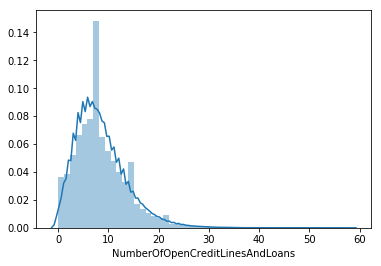

In [43]:
sns.distplot(df.NumberOfOpenCreditLinesAndLoans)

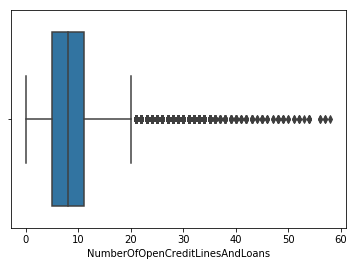

In [44]:
sns.boxplot(df.NumberOfOpenCreditLinesAndLoans)

# Finding outlier based on IQR method

In [45]:
q3 = np.quantile(df.NumberOfOpenCreditLinesAndLoans,0.75)
q1 = np.quantile(df.NumberOfOpenCreditLinesAndLoans,0.25)
IQR = q3-q1
uw = q3+(1.5*IQR)
uw

20.0

# Finding the outliers based of Z score ... 3sigma + mean

In [46]:
a = np.std(df.NumberOfOpenCreditLinesAndLoans)

In [47]:
a

5.145933836446702

In [48]:
c = a*3

In [49]:
b =  df.NumberOfOpenCreditLinesAndLoans.mean()

In [50]:
b+c

23.89056150934011

# Going with outliers based on z score

In [51]:
## SInce the variable is approximately normal, we decided the upper limit cut off based on distribution based method. mu+3*sigma.Since the number of observations were less, we decided to cap the large values to the cut off.

In [52]:
df.loc[df['NumberOfOpenCreditLinesAndLoans']>24,'NumberOfOpenCreditLinesAndLoans'] = 24

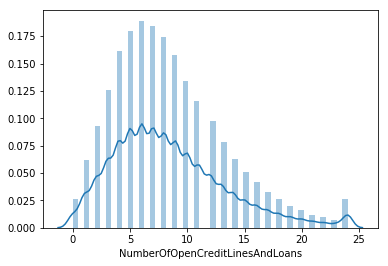

In [53]:
sns.distplot(df.NumberOfOpenCreditLinesAndLoans)

# Now Considering Monthly Income column

In [54]:
df.MonthlyIncome.describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

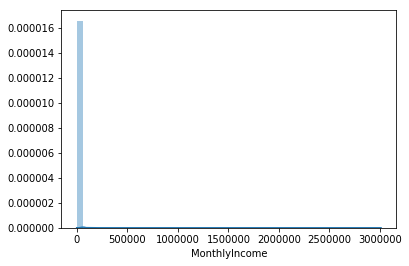

In [55]:
sns.distplot(df.MonthlyIncome.dropna())

In [56]:
df.MonthlyIncome.count()

120269

In [57]:
len(df[df.MonthlyIncome<1000])

4428

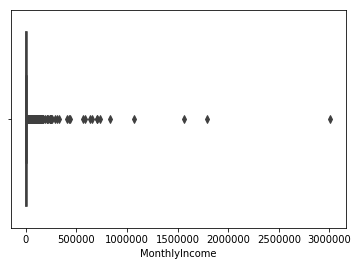

In [58]:
sns.boxplot(df.MonthlyIncome)

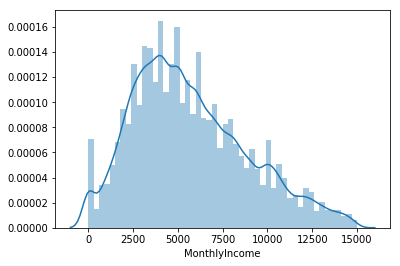

In [59]:
df2 = df[df['MonthlyIncome']<15000]
sns.distplot(df2.MonthlyIncome)

# We need to make use of IQR method as mean and median are highly contaminated by extremely high outliers

In [60]:
q3 = np.quantile(df2.MonthlyIncome,0.75)
q1 = np.quantile(df2.MonthlyIncome,0.25)
IQR = q3-q1
uw = q3+(1.5*IQR)
uw

14358.125

In [61]:
df['MonthlyIncome'] = df['MonthlyIncome'].apply(lambda x : np.NaN if (x<1000)|(x>15500) else x)

## Typical lower limit for monthly income to be serviced by finance industry is $1000. Upper cutoff is decided based on IQR method as above

In [62]:
df.MonthlyIncome.describe()

count    110958.000000
mean       5978.202906
std        3157.675863
min        1000.000000
25%        3500.000000
50%        5385.500000
75%        7983.000000
max       15500.000000
Name: MonthlyIncome, dtype: float64

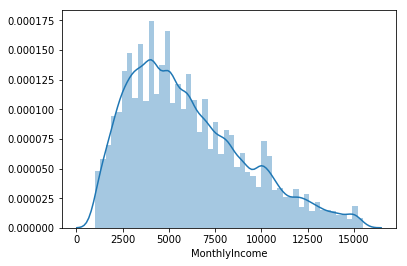

In [63]:
sns.distplot(df.MonthlyIncome.dropna())

In [64]:
df['MonthlyIncome'].fillna(method='ffill',inplace=True)

In [65]:
df.MonthlyIncome.describe()

count    150000.000000
mean       5976.702547
std        3152.342033
min        1000.000000
25%        3500.000000
50%        5380.000000
75%        7990.250000
max       15500.000000
Name: MonthlyIncome, dtype: float64

In [66]:
#sns.distplot(df.MonthlyIncome)

In [67]:
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
93335,93336,0,0.000000,75.0,0.000952,10500.0,8,0,0.0
12925,12926,0,0.002885,43.0,0.674522,5600.0,7,1,0.0
27297,27298,0,0.489130,33.0,0.674522,5600.0,9,0,0.0
95905,95906,0,0.324553,49.0,0.352995,10900.0,12,2,2.0
122743,122744,0,0.019486,40.0,0.352995,10900.0,4,0,NaN


# Now working on NumberRealEstateLoansOrLines

In [68]:
df.NumberRealEstateLoansOrLines.describe()

count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

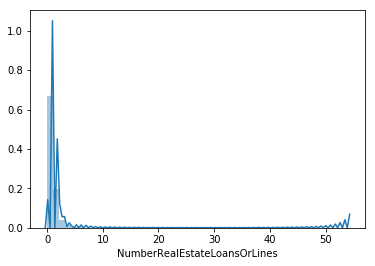

In [69]:
sns.distplot(df.NumberRealEstateLoansOrLines)

In [70]:
q3 = np.quantile(df.NumberRealEstateLoansOrLines,0.75)
q1 = np.quantile(df.NumberRealEstateLoansOrLines,0.25)
IQR = q3-q1
uw = q3+(1.5*IQR)
uw

5.0

In [71]:
df['NumberRealEstateLoansOrLines'] = df['NumberRealEstateLoansOrLines'].apply(lambda x: np.NaN if(x>5) else x)

In [72]:
df.NumberRealEstateLoansOrLines.describe()

count    149207.000000
mean          0.981234
std           0.980390
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           5.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

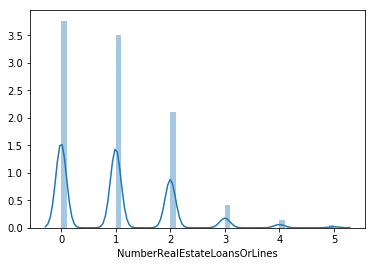

In [73]:
sns.distplot(df.NumberRealEstateLoansOrLines.dropna())

In [74]:
df['NumberRealEstateLoansOrLines'].fillna(method='ffill',inplace=True)

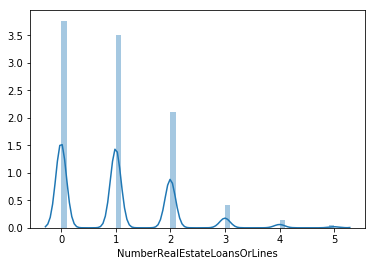

In [75]:
sns.distplot(df.NumberRealEstateLoansOrLines)

In [76]:
df.NumberRealEstateLoansOrLines.describe()

count    150000.000000
mean          0.981373
std           0.980357
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           5.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

# Now working with number of dependents

In [77]:
df.NumberOfDependents.describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

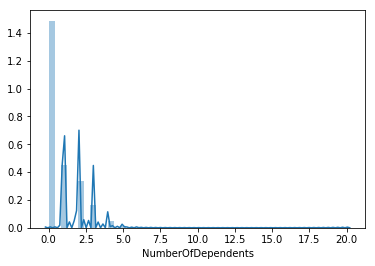

In [78]:
sns.distplot(df.NumberOfDependents.dropna())

In [79]:
df.loc[df['NumberOfDependents']>5,'NumberOfDependents']=5

In [80]:
df['NumberOfDependents'].fillna(0,inplace=True)

In [81]:
df.NumberOfDependents.describe()

count    150000.000000
mean          0.734747
std           1.093439
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: NumberOfDependents, dtype: float64

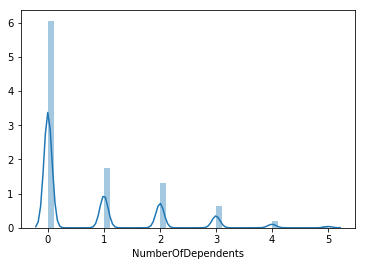

In [82]:
sns.distplot(df.NumberOfDependents)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 93335 to 65082
Data columns (total 9 columns):
ID                                      150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null float64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null float64
NumberOfDependents                      150000 non-null float64
dtypes: float64(6), int64(3)
memory usage: 11.4 MB


In [84]:
df.describe()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,0.303752,51.169207,0.302780,5976.702547,8.404000,0.981373,0.734747
std,43301.414527,0.249746,0.337802,13.664200,0.226622,3152.342033,4.946399,0.980357,1.093439
min,1.000000,0.000000,0.000000,21.000000,0.000000,1000.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.028657,41.000000,0.125551,3500.000000,5.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.144524,51.000000,0.273829,5380.000000,8.000000,1.000000,0.000000
75%,112500.250000,0.000000,0.520083,62.000000,0.437432,7990.250000,11.000000,2.000000,1.000000
max,150000.000000,1.000000,1.000000,80.000000,1.000000,15500.000000,24.000000,5.000000,5.000000


In [ ]:
df.to_pickle('gmsc_clean.pkl')

## The Data is now clean ... We can Go ahead for EDA -- Visualisation

**EDA**

1. Univariate -- Already Done while Cleaning the data
2. Bivariate

In [85]:
#sns.pairplot(data=df)

In [86]:
dfs = df.drop('ID',axis=1)
dfs.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
93335,0,0.000000,75.0,0.000952,10500.0,8,0.0,0.0
12925,0,0.002885,43.0,0.674522,5600.0,7,1.0,0.0
27297,0,0.489130,33.0,0.674522,5600.0,9,0.0,0.0
95905,0,0.324553,49.0,0.352995,10900.0,12,2.0,2.0
122743,0,0.019486,40.0,0.352995,10900.0,4,0.0,0.0


### SeriousDlqin2yrs and RevolvingUtilizationOfUnsecuredLines

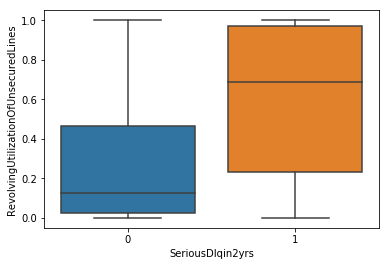

In [87]:
sns.boxplot(data=df,x=df.SeriousDlqin2yrs,y=df.RevolvingUtilizationOfUnsecuredLines)

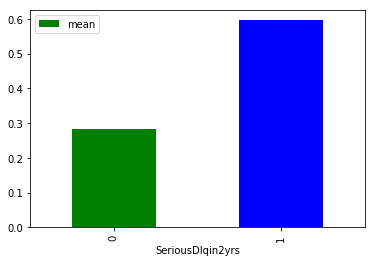

In [88]:
df['RevolvingUtilizationOfUnsecuredLines'].groupby(df['SeriousDlqin2yrs']).agg(['mean']).plot(kind='bar',color=[['green','blue']])

### The chart shows that mean value of rucl is almost double for deliquents compared to non deliquents. This observation is inline with what normally observed in Finance Industry.

In [89]:
df.RevolvingUtilizationOfUnsecuredLines.describe()

count    150000.000000
mean          0.303752
std           0.337802
min           0.000000
25%           0.028657
50%           0.144524
75%           0.520083
max           1.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [90]:
def rucl_cat(rucl):
    if(rucl<=0.02):
        return 1
    elif (0.02<rucl<=0.14):
        return 2
    elif (0.14<rucl<=0.5):
        return 3
    else:
        return 4

In [91]:
df['rucl_cat'] = df['RevolvingUtilizationOfUnsecuredLines'].apply(rucl_cat)

In [92]:
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,rucl_cat
93335,93336,0,0.000000,75.0,0.000952,10500.0,8,0.0,0.0,1
12925,12926,0,0.002885,43.0,0.674522,5600.0,7,1.0,0.0,1
27297,27298,0,0.489130,33.0,0.674522,5600.0,9,0.0,0.0,3
95905,95906,0,0.324553,49.0,0.352995,10900.0,12,2.0,2.0,3
122743,122744,0,0.019486,40.0,0.352995,10900.0,4,0.0,0.0,1


# To cross check we can apply groupvy ... INTERESTING

In [93]:
df['RevolvingUtilizationOfUnsecuredLines'].groupby(df['rucl_cat']).agg(['min','max'])

,min,max
rucl_cat,,
1,0.000000,0.020000
2,0.020003,0.139999
3,0.140022,0.499962
4,0.500039,1.000000


### Now we will focus on rucl_cat column and target column

In [94]:
pd.crosstab(df['rucl_cat'],df['SeriousDlqin2yrs'],normalize=0) # Normalize is for proportion value and 0 is along horizontally

SeriousDlqin2yrs,0,1
rucl_cat,,
1,0.973487,0.026513
2,0.973022,0.026978
3,0.947946,0.052054
4,0.842532,0.157468


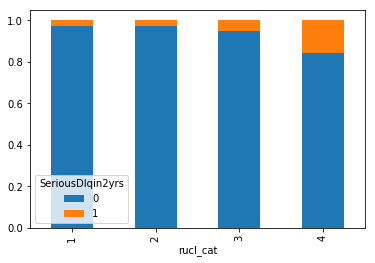

In [95]:
ct = pd.crosstab(df['rucl_cat'],df['SeriousDlqin2yrs'],normalize=0)
ct.plot.bar(stacked=True)

### The chart shows that rucl more than 0.52 (category 4) is quite prone to deliquency.

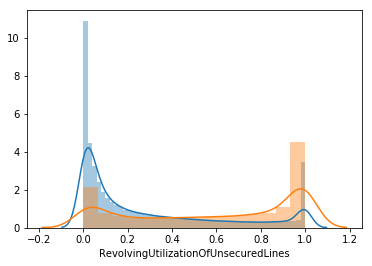

In [96]:
df0 = df[df['SeriousDlqin2yrs']==0]
df1 = df[df['SeriousDlqin2yrs']==1]

sns.distplot(df0.RevolvingUtilizationOfUnsecuredLines)
sns.distplot(df1.RevolvingUtilizationOfUnsecuredLines)


# Now consider SeriousDlqin2yrs and Monthly Income

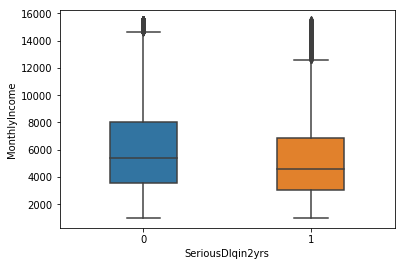

In [97]:
sns.boxplot(data=df,x=df.SeriousDlqin2yrs,y=df.MonthlyIncome,width=0.4)

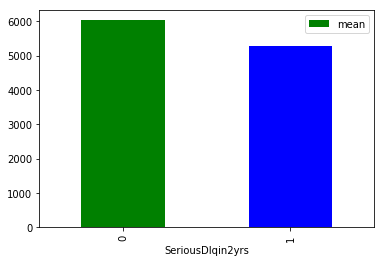

In [98]:
df['MonthlyIncome'].groupby(df['SeriousDlqin2yrs']).agg(['mean']).plot(kind='bar',color=[['green','blue']])

In [99]:
df.MonthlyIncome.describe()

count    150000.000000
mean       5976.702547
std        3152.342033
min        1000.000000
25%        3500.000000
50%        5380.000000
75%        7990.250000
max       15500.000000
Name: MonthlyIncome, dtype: float64

In [100]:
def mi(mi):
    if(mi<=3500):
        return 1
    elif(3500<mi<=5400):
        return 2
    elif(5400<mi<=8000):
        return 3
    else:
        return 4

In [101]:
df['mi_buckets'] = df.MonthlyIncome.apply(mi)

In [102]:
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,rucl_cat,mi_buckets
93335,93336,0,0.000000,75.0,0.000952,10500.0,8,0.0,0.0,1,4
12925,12926,0,0.002885,43.0,0.674522,5600.0,7,1.0,0.0,1,3
27297,27298,0,0.489130,33.0,0.674522,5600.0,9,0.0,0.0,3,3
95905,95906,0,0.324553,49.0,0.352995,10900.0,12,2.0,2.0,3,4
122743,122744,0,0.019486,40.0,0.352995,10900.0,4,0.0,0.0,1,4


In [103]:
df.MonthlyIncome.groupby(df.mi_buckets).agg(['min','max'])

,min,max
mi_buckets,,
1,1000.0,3500.0
2,3501.0,5400.0
3,5401.0,8000.0
4,8001.0,15500.0


In [104]:
pd.crosstab(df.SeriousDlqin2yrs,df.mi_buckets,normalize=1)

mi_buckets,1,2,3,4
SeriousDlqin2yrs,,,,
0,0.912594,0.927383,0.940851,0.952642
1,0.087406,0.072617,0.059149,0.047358


(0.75, 1.05)

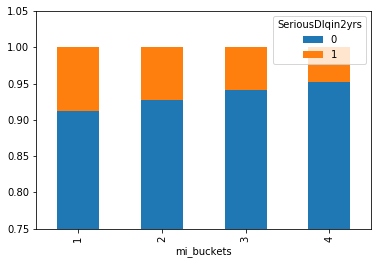

In [105]:
ct = pd.crosstab(df.mi_buckets,df.SeriousDlqin2yrs,normalize=0)
ct.plot.bar(stacked=True)
plt.ylim(0.75)

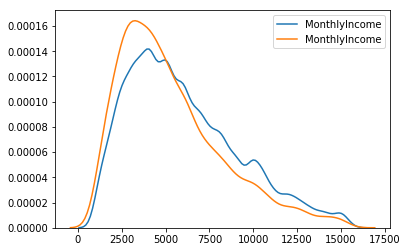

In [106]:
df0 = df[df['SeriousDlqin2yrs']==0]
df1 = df[df['SeriousDlqin2yrs']==1]

sns.kdeplot(df0.MonthlyIncome)
sns.kdeplot(df1.MonthlyIncome)

In [107]:
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,rucl_cat,mi_buckets
93335,93336,0,0.000000,75.0,0.000952,10500.0,8,0.0,0.0,1,4
12925,12926,0,0.002885,43.0,0.674522,5600.0,7,1.0,0.0,1,3
27297,27298,0,0.489130,33.0,0.674522,5600.0,9,0.0,0.0,3,3
95905,95906,0,0.324553,49.0,0.352995,10900.0,12,2.0,2.0,3,4
122743,122744,0,0.019486,40.0,0.352995,10900.0,4,0.0,0.0,1,4


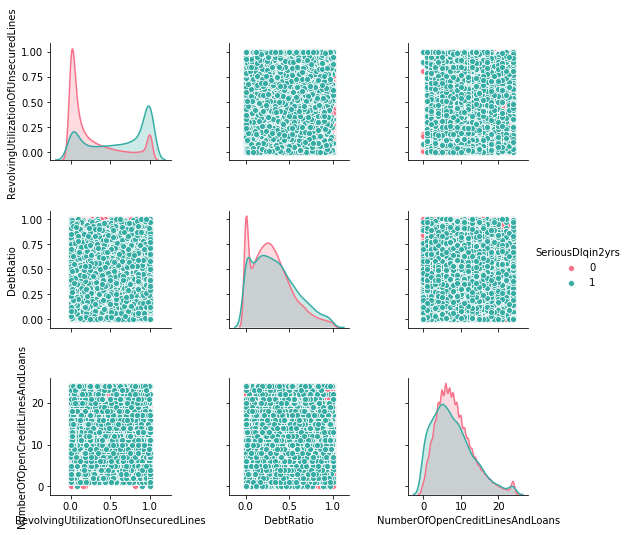

In [108]:
sns.pairplot(data=df,vars=['RevolvingUtilizationOfUnsecuredLines','DebtRatio','NumberOfOpenCreditLinesAndLoans'],hue='SeriousDlqin2yrs',palette='husl')

In [109]:
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,rucl_cat,mi_buckets
93335,93336,0,0.000000,75.0,0.000952,10500.0,8,0.0,0.0,1,4
12925,12926,0,0.002885,43.0,0.674522,5600.0,7,1.0,0.0,1,3
27297,27298,0,0.489130,33.0,0.674522,5600.0,9,0.0,0.0,3,3
95905,95906,0,0.324553,49.0,0.352995,10900.0,12,2.0,2.0,3,4
122743,122744,0,0.019486,40.0,0.352995,10900.0,4,0.0,0.0,1,4


# Scaling

1. If scaling is not done, the higher unit feature tends to have high affect on the distance when compared to lower distance feature.
2. Methods of scaling
    1. Min-Max Scaling ((x-min)/(max-min)) --- Has a disadvantage that the values highly get affected by OUTLIERS
    2. Standard Scalar (Z score) scaling (from scipy.stats import zscore and then df = df.apply(zscore)) or (x-mu)/std -- here also the outliers may affect the mu and sigma but not to that extent.
    
**Where is Scaling Compulsory**

1. Algos with distance calculations -- kNN, Clustering
2. Prefer using the Standard Scalar
3. ANN's --- Normalization is Recommended (Min-Max Scaling)
4. When there is a doubt whether to use or not --- build a model based on both scaled data and original data and test the acc.
5. In general scaling will not make a difference for TREE based algos.
6. For Linear and Logistic Regression, the slopes will take care of standardization ... hence no need to apply any scaling.

## Transformation

1. Transformation is done majorly on the dependent variable when there are extreme continouos values -- we apply log transformation.
2. Transforming the independent variables does not affect the results to any extent.

## Categorical Variables

1. Make use of pd.get_dummies() mostly.
2. Label Encoding wont work for regression.
3. When there are many columns, get_dummies would result in curse of dimensionality and you have to go for trying out both label encoder and get_dummies
4. Label Encoding majorly used when u have orinal data ... high medium low

## VIF

(1/(1-r2))

1. In general people prefer VIF over corr.

# Model Building

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 93335 to 65082
Data columns (total 11 columns):
ID                                      150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null float64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null float64
NumberOfDependents                      150000 non-null float64
rucl_cat                                150000 non-null int64
mi_buckets                              150000 non-null int64
dtypes: float64(6), int64(5)
memory usage: 18.7 MB


In [282]:
y = df.SeriousDlqin2yrs
x = df.iloc[:,2:9]

In [283]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 93335 to 65082
Data columns (total 7 columns):
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null float64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null float64
NumberOfDependents                      150000 non-null float64
dtypes: float64(6), int64(1)
memory usage: 14.2 MB


In [284]:
from sklearn.model_selection import train_test_split

In [285]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [286]:
x_train.shape,x_test.shape

((105000, 7), (45000, 7))

In [287]:
import statsmodels.api as sm

In [124]:
x_cont = sm.add_constant(x_train)
x_cont1 = sm.add_constant(x_test)

C:\Users\KUS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
vif = [variance_inflation_factor(x_cont.values,i) for i in range(x_cont.shape[1])]
vif1 = pd.DataFrame({'vif':vif,'features':x_cont.columns})
vif1

,vif,features
0,24.282778,const
1,1.102238,RevolvingUtilizationOfUnsecuredLines
2,1.136405,age
3,1.300278,DebtRatio
4,1.139650,MonthlyIncome
5,1.319095,NumberOfOpenCreditLinesAndLoans
6,1.480490,NumberRealEstateLoansOrLines
7,1.086999,NumberOfDependents


In [125]:
logit_model = sm.Logit(y_train,x_cont)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.218034
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               105000
Model:                          Logit   Df Residuals:                   104992
Method:                           MLE   Df Model:                            7
Date:                Tue, 01 Oct 2019   Pseudo R-squ.:                  0.1088
Time:                        12:14:16   Log-Likelihood:                -22894.
converged:                       True   LL-Null:                       -25689.
                                        LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.6969      0.062    -43.435      0.000      -2.819      -2.575
RevolvingUtilizationOfUnsecuredLines     2.1804      0.037     59.385      0.000       2.108       2.252
age                                     -0.0196      0.001    -18.627      0.000      -0.022      -0.018
DebtRatio                                0.3769      0.062      6.120      0.000       0.256       0.498
MonthlyIncome                        -5.441e-05    4.7e-06    -11.571      0.000   -6.36e-05   -4.52e-05
NumberOfOpenCreditLinesAndLoans          0.0268      0.003      8.881      0.000       0.021       0.033
NumberRealEstateLoansOrLines            -0.0491      0.016     -2.990      0.003      -0.081      -0.017
NumberOfDependents                       0.0934      0.011      8.492      0.000       0.072       0.115
========================================================================================================
"""

### Logistic Regression Equation

p =(e^(a+bx))/(1+e^(a+bx))

log(p/(p-1)) = a+bx

odds = p/(p-1)

--> log(odds) = a+bx

In [127]:
logit_model = sm.Logit(y_test,x_cont1)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.219551
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       SeriousDlqin2yrs   No. Observations:                45000
Model:                          Logit   Df Residuals:                    44992
Method:                           MLE   Df Model:                            7
Date:                Tue, 01 Oct 2019   Pseudo R-squ.:                  0.1115
Time:                        12:14:46   Log-Likelihood:                -9879.8
converged:                       True   LL-Null:                       -11119.
                                        LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.8283      0.096    -29.590      0.000      -3.016      -2.641
RevolvingUtilizationOfUnsecuredLines     2.2386      0.056     39.800      0.000       2.128       2.349
age                                     -0.0188      0.002    -11.693      0.000      -0.022      -0.016
DebtRatio                                0.4363      0.093      4.717      0.000       0.255       0.618
MonthlyIncome                        -5.439e-05   7.21e-06     -7.545      0.000   -6.85e-05   -4.03e-05
NumberOfOpenCreditLinesAndLoans          0.0303      0.005      6.617      0.000       0.021       0.039
NumberRealEstateLoansOrLines            -0.0222      0.025     -0.901      0.368      -0.070       0.026
NumberOfDependents                       0.0892      0.017      5.309      0.000       0.056       0.122
========================================================================================================
"""

In [167]:
y_prob = result.predict(x_cont1)

In [168]:
y_test = pd.DataFrame(y_test)

In [169]:
y_test['prob'] = y_prob
y_test.head()

,SeriousDlqin2yrs,prob,y_pred
84188,0,0.027233,0
97532,0,0.018889,0
62222,0,0.130573,0
130389,0,0.023170,0
62741,1,0.168094,0


In [170]:
y_test['y_pred'] = y_test['prob'].apply(lambda x: 1 if x>=0.1 else 0)

In [171]:
y_test.head()

,SeriousDlqin2yrs,prob,y_pred
84188,0,0.027233,0
97532,0,0.018889,0
62222,0,0.130573,1
130389,0,0.023170,0
62741,1,0.168094,1


In [172]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve

In [173]:
cm = confusion_matrix(y_test['SeriousDlqin2yrs'],y_test['y_pred'])
cm

array([[33773,  8190],
       [ 1307,  1730]], dtype=int64)

# ROC Curve

In [177]:
fpr, tpr, thresholds = roc_curve(y_test['SeriousDlqin2yrs'], y_test['prob'])

In [178]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99787908, 0.99787908,
       1.        ])

In [179]:
tpr

array([0.00000000e+00, 3.29272308e-04, 6.58544616e-04, ...,
       9.99670728e-01, 1.00000000e+00, 1.00000000e+00])

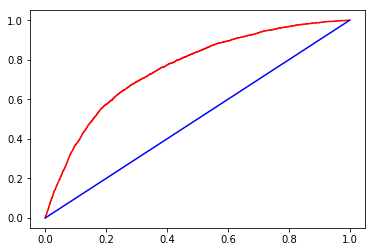

In [180]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')

In [181]:
roc_auc_score(y_test['SeriousDlqin2yrs'],y_test['prob'])

0.7573489741354611

# Sensitivity Analysis -- To get to the optimal cut off value of prob

1. What is the cost of predicting bad as good
2. What is the cost of predicting good as bad

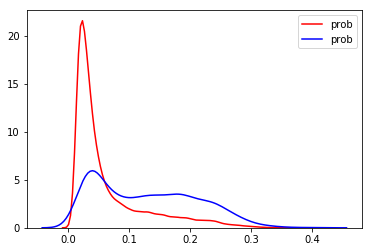

In [183]:
import seaborn as sns
df0 = y_test[y_test['SeriousDlqin2yrs']==0]
df1 = y_test[y_test['SeriousDlqin2yrs']==1]


sns.kdeplot(df0['prob'],color='r')
sns.kdeplot(df1['prob'],color='b')

## Machine Learning Model

In [288]:
from sklearn.linear_model import LogisticRegression

In [289]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 42)

In [290]:
LR = LogisticRegression()
model = LR.fit(x_train,y_train)
y_pred = model.predict(x_test)

C:\Users\KUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [291]:
LR.score(x_test,y_test)

0.9325111111111111

In [292]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[41963,     0],
       [ 3037,     0]], dtype=int64)

In [293]:
y_prob = LR.predict_proba(x_test)[:,1]

In [294]:
fpr,tpr,threshold = roc_curve(y_test,y_prob)

In [295]:
roc_auc_score(y_test,y_prob)

0.6386714911079566

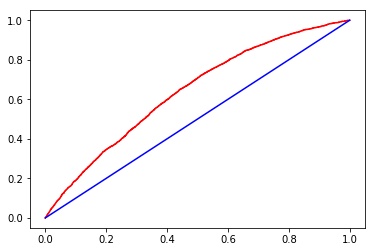

In [296]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')

# Hyper Parameter Tuning for Improving the Model Score

In [297]:
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV

C will tell u how sensitive you are to the errors

In [203]:
LR = LogisticRegression()
param_grid = [{'C':[0.1,0.2,0.3,0.4,0.5,0.6],'penalty':['l1','l2']}]
gs = GridSearchCV(LR,param_grid,cv=3,scoring='accuracy')
gs.fit(x_train,y_train)

C:\Users\KUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [204]:
gs.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [205]:
LR = LogisticRegression(**gs.best_params_)
model = LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

C:\Users\KUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [207]:
y_prob = LR.predict_proba(x_test)[:,1]

In [208]:
roc_auc_score(y_test,y_prob)

0.7570514261544565

In [209]:
fpr,tpr,threshold = roc_curve(y_test,y_prob)

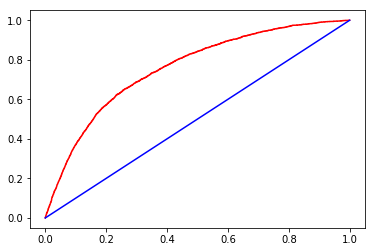

In [210]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')

# Now Lets check whether scaling improves the accuracy

In [211]:
from sklearn.preprocessing import StandardScaler

In [212]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [213]:
LR = LogisticRegression(**gs.best_params_)
model = LR.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)

C:\Users\KUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [215]:
y_prob = model.predict_proba(x_test_scaled)[:,1]

In [216]:
roc_auc_score(y_test,y_prob)

0.7572793971853671

### We see that scaling has also not affected the accuracy score of the model and hence we need to go for more complex algorithm.

# Difference between fit, fit_trasform, transform

1. ss.fit(x) -- ss stores the mu and sigma -- calculates mu and sigma of x and store in memory
2. ss.fit_transform(x) -- used during training -- ss calculates mu and sigma of x and stores it in the memory and transform will perform transformation on the x data.
3. ss.transform(x) -- used during testing -- as mu and sigma are already during training, it will directly go on to perform transformation.

# Finding the Best Cut Off

In [218]:
diff = tpr-fpr
diff

array([0.        , 0.00032927, 0.00065854, ..., 0.00174398, 0.00207326,
       0.        ])

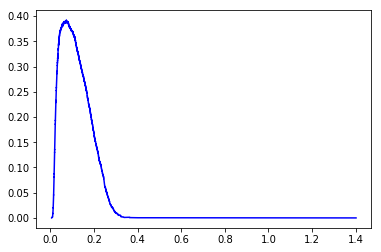

In [219]:
plt.plot(threshold,diff,color='b')

The peak is the cut off when the cost of missclassification on both sides is same ... that means more than cut off prob ... he will default and vice versa

In [221]:
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = threshold[optimal_idx]
optimal_threshold

0.07281120115447025

In [223]:
df_new = pd.read_csv('gsmc_to_score.csv')
df_new = df_new.drop('Unnamed: 0',axis=1)
df_new.head()

,ID,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,38250,0.689749,38,0.650818,4584.0,13,2,0.0
1,13403,1.043621,32,0.025321,5765.0,3,0,1.0
2,8615,0.456954,48,0.580222,6400.0,7,2,1.0
3,21200,0.368844,52,0.078662,9775.0,8,0,0.0
4,100806,0.505278,62,0.414859,6500.0,23,0,2.0


In [225]:
df_new.isnull().sum()

ID                                       0
RevolvingUtilizationOfUnsecuredLines     0
age                                      0
DebtRatio                                0
MonthlyIncome                           37
NumberOfOpenCreditLinesAndLoans          0
NumberRealEstateLoansOrLines             0
NumberOfDependents                       2
dtype: int64

In [224]:
df_new.shape

(200, 8)

### This is the data that the bank has given u and asked us to quickly tell whom to give loan and whom not to.

**All the steps that we performed above for data cleaning has to be perfomed again on this data**

# Considering the Revol column

In [226]:
df_new.RevolvingUtilizationOfUnsecuredLines.describe()

count    200.000000
mean       0.402545
std        0.390234
min        0.000000
25%        0.057354
50%        0.253041
75%        0.708836
max        1.744511
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

## This should not be happening ... cause this value should be in range 0 to 1

## Checking how many values are more than 1

In [227]:
len(df_new[df_new['RevolvingUtilizationOfUnsecuredLines']>1])

8

In [228]:
(df_new['RevolvingUtilizationOfUnsecuredLines']).describe()

count    200.000000
mean       0.402545
std        0.390234
min        0.000000
25%        0.057354
50%        0.253041
75%        0.708836
max        1.744511
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

## Since the count is more we cant drop .. Hence we need to treat them ... First make them nan and then impute with mean or median

# Outliers are normally dropped from the data set, however since the bumber of outlier observation are large, we will treat these as missing values and impute.

In [229]:
df_new.RevolvingUtilizationOfUnsecuredLines = df_new['RevolvingUtilizationOfUnsecuredLines'].apply(lambda x: np.NaN if x>1 else x)

In [230]:
df_new.RevolvingUtilizationOfUnsecuredLines.head()

0    0.689749
1         NaN
2    0.456954
3    0.368844
4    0.505278
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [231]:
len(df_new[df_new['RevolvingUtilizationOfUnsecuredLines']>1])

0

In [232]:
df_new.RevolvingUtilizationOfUnsecuredLines.describe()

count    192.000000
mean       0.366846
std        0.350641
min        0.000000
25%        0.053943
50%        0.221073
75%        0.656174
max        1.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

## Since we have the contextual knowledge hence we have identified the outliers saying > 1 are all outliers otherwise u go with either z score or box plot

In [233]:
df_new['RevolvingUtilizationOfUnsecuredLines'].fillna(method='ffill',inplace=True)

# After imputing with median, we noticed a spike at the place of median hence, we adopted an imputation method which preserved the distribution of data. (method = 'ffill')

In [234]:
df_new.RevolvingUtilizationOfUnsecuredLines.head()

0    0.689749
1    0.689749
2    0.456954
3    0.368844
4    0.505278
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

# Now working with Age column

In [237]:
df_new.age.describe()

count    200.000000
mean      50.055000
std       14.932073
min       21.000000
25%       40.000000
50%       49.000000
75%       60.250000
max       92.000000
Name: age, dtype: float64

In [238]:
len(df_new[df_new.age>80])

6

In [239]:
df_new.age = df_new.age.apply(lambda x : np.NaN if (x>80)|(x<18) else x)

## Finance industry typically limit age of customer between 18 and 80. Also there are about 4900 observations above 80 years of age. Since this is large, we made those observation values missing to impute later.

In [240]:
len(df_new[df_new.age>80])

0

In [241]:
df_new['age'].fillna(method='ffill',inplace=True)

In [242]:
df_new.age.describe()

count    200.000000
mean      48.865000
std       13.794135
min       21.000000
25%       40.000000
50%       49.000000
75%       59.250000
max       80.000000
Name: age, dtype: float64

# Now working with Debt Ratio

In [243]:
df_new.DebtRatio.describe()

count     200.000000
mean      334.923930
std      1043.976375
min         0.000000
25%         0.104693
50%         0.318091
75%         0.747402
max      7357.000000
Name: DebtRatio, dtype: float64

In [244]:
len(df_new[df_new['DebtRatio']>1])

43

In [245]:
df_new.DebtRatio = df_new.DebtRatio.apply(lambda x: np.NaN if x>1 else x)

In [246]:
df_new.DebtRatio.describe()

count    157.000000
mean       0.270859
std        0.225548
min        0.000000
25%        0.086808
50%        0.245117
75%        0.414859
max        0.994119
Name: DebtRatio, dtype: float64

In [247]:
df_new.DebtRatio.fillna(method='ffill',inplace=True)

## When imputed with median, thee distribution of the data was messed up and hence we went with ffill.

# Now working on NumberOfOpenCreditLinesAndLoans

In [248]:
df_new.NumberOfOpenCreditLinesAndLoans.describe()

count    200.000000
mean       8.255000
std        5.361315
min        0.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       30.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

# Finding outlier based on IQR method

In [249]:
q3 = np.quantile(df_new.NumberOfOpenCreditLinesAndLoans,0.75)
q1 = np.quantile(df_new.NumberOfOpenCreditLinesAndLoans,0.25)
IQR = q3-q1
uw = q3+(1.5*IQR)
uw

19.0

# Finding the outliers based of Z score ... 3sigma + mean

In [253]:
a = np.std(df_new.NumberOfOpenCreditLinesAndLoans)

In [254]:
a

5.347894445480387

In [255]:
c = a*3

In [256]:
b =  df_new.NumberOfOpenCreditLinesAndLoans.mean()

In [257]:
b+c

24.298683336441165

# Going with outliers based on z score

In [51]:
## SInce the variable is approximately normal, we decided the upper limit cut off based on distribution based method. mu+3*sigma.Since the number of observations were less, we decided to cap the large values to the cut off.

In [258]:
df_new.loc[df_new['NumberOfOpenCreditLinesAndLoans']>24,'NumberOfOpenCreditLinesAndLoans'] = 24

# Now Considering Monthly Income column

In [259]:
df_new.MonthlyIncome.describe()

count      163.000000
mean      6354.736196
std       5221.829687
min          0.000000
25%       3329.000000
50%       5014.000000
75%       7804.500000
max      51140.000000
Name: MonthlyIncome, dtype: float64

In [260]:
df_new.MonthlyIncome.count()

163

In [261]:
len(df_new[df_new.MonthlyIncome<1000])

3

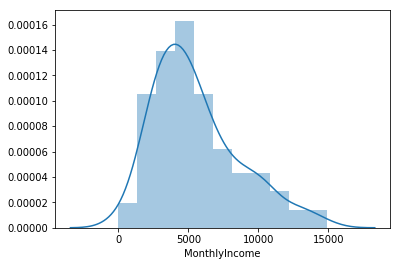

In [262]:
df2 = df_new[df_new['MonthlyIncome']<15000]
sns.distplot(df2.MonthlyIncome)

# We need to make use of IQR method as mean and median are highly contaminated by extremely high outliers

In [263]:
q3 = np.quantile(df2.MonthlyIncome,0.75)
q1 = np.quantile(df2.MonthlyIncome,0.25)
IQR = q3-q1
uw = q3+(1.5*IQR)
uw

13188.75

In [264]:
df_new['MonthlyIncome'] = df_new['MonthlyIncome'].apply(lambda x : np.NaN if (x<1000)|(x>15500) else x)

## Typical lower limit for monthly income to be serviced by finance industry is $1000. Upper cutoff is decided based on IQR method as above

In [265]:
df_new.MonthlyIncome.describe()

count      154.000000
mean      5821.500000
std       3270.137714
min       1000.000000
25%       3372.500000
50%       5000.000000
75%       7495.000000
max      15300.000000
Name: MonthlyIncome, dtype: float64

In [266]:
df_new['MonthlyIncome'].fillna(method='ffill',inplace=True)

In [267]:
df_new.MonthlyIncome.describe()

count      200.000000
mean      6083.530000
std       3340.236345
min       1000.000000
25%       3500.000000
50%       5133.000000
75%       8105.000000
max      15300.000000
Name: MonthlyIncome, dtype: float64

# Now working on NumberRealEstateLoansOrLines

In [268]:
df_new.NumberRealEstateLoansOrLines.describe()

count    200.000000
mean       0.900000
std        0.982255
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        5.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

In [269]:
q3 = np.quantile(df_new.NumberRealEstateLoansOrLines,0.75)
q1 = np.quantile(df_new.NumberRealEstateLoansOrLines,0.25)
IQR = q3-q1
uw = q3+(1.5*IQR)
uw

2.5

In [270]:
df_new['NumberRealEstateLoansOrLines'] = df_new['NumberRealEstateLoansOrLines'].apply(lambda x: np.NaN if(x>5) else x)

In [271]:
df_new.NumberRealEstateLoansOrLines.describe()

count    200.000000
mean       0.900000
std        0.982255
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        5.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

In [272]:
df_new['NumberRealEstateLoansOrLines'].fillna(method='ffill',inplace=True)

# Now working with number of dependents

In [273]:
df_new.NumberOfDependents.describe()

count    198.000000
mean       0.797980
std        1.174862
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        6.000000
Name: NumberOfDependents, dtype: float64

In [274]:
df_new.loc[df_new['NumberOfDependents']>5,'NumberOfDependents']=5

In [275]:
df_new['NumberOfDependents'].fillna(0,inplace=True)

In [277]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
ID                                      200 non-null int64
RevolvingUtilizationOfUnsecuredLines    200 non-null float64
age                                     200 non-null float64
DebtRatio                               200 non-null float64
MonthlyIncome                           200 non-null float64
NumberOfOpenCreditLinesAndLoans         200 non-null int64
NumberRealEstateLoansOrLines            200 non-null int64
NumberOfDependents                      200 non-null float64
dtypes: float64(5), int64(3)
memory usage: 12.6 KB


In [278]:
id = pd.DataFrame({'ID':df_new.ID})
id.head()

,ID
0,38250
1,13403
2,8615
3,21200
4,100806


In [280]:
df_new = df_new.drop('ID',axis=1)
df_new.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,0.689749,38.0,0.650818,4584.0,13,2,0.0
1,0.689749,32.0,0.025321,5765.0,3,0,1.0
2,0.456954,48.0,0.580222,6400.0,7,2,1.0
3,0.368844,52.0,0.078662,9775.0,8,0,0.0
4,0.505278,62.0,0.414859,6500.0,23,0,2.0


In [299]:
model.predict(df_new)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [303]:
y_prob = model.predict_proba(df_new)[:,1]

In [305]:
id['prob'] = y_prob
id.head()

,ID,prob
0,38250,0.106707
1,13403,0.131287
2,8615,0.064798
3,21200,0.040370
4,100806,0.032976


## Now we know the cut off --- we will be applying that to classify

In [306]:
id['Approve'] = id['prob'].apply(lambdabda x: 'Yes' if x<0.07 else 'No')

In [307]:
id.head()

,ID,prob,Approve
0,38250,0.106707,No
1,13403,0.131287,No
2,8615,0.064798,Yes
3,21200,0.040370,Yes
4,100806,0.032976,Yes


# Done with one CIRCLE of ANALYTICS